# Test 4 technologies to validate the use/construction separation method

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

In [2]:
from func import *

In [3]:
# Results from ecos_sep_constr_use
R_long_tot_constr = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_constr.csv")
R_long_tot_use = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_use.csv")

In [4]:
# Results from brightway
pv_midpoints_bw = pd.read_csv("AB_results/PV_LCIA-results.csv")
wind_midpoints_bw = pd.read_csv("AB_results/ES_sep_wind_LCIA-results.csv")
wind_endpoints_bw = pd.read_csv("AB_results/ES_sep_wind_endpoints_LCIA-results.csv")
cement_midpoints_bw = pd.read_csv("AB_results/cement_midpoints_LCIA-results.csv")

In [5]:
midpoint_categories, endpoint_categories_HH, endpoint_categories_EQ = impact_categories(R_constr=R_long_tot_constr, R_use=R_long_tot_use)

## PV

Ecoinvent units:
- construction: [/unit] (units of 3 kW)
- use : [/kWh]

ES units:
- construction: [/GW]
- use: [/GWh]

Capacity factor: 3e(-6) (construction)
Conversion factor: 1e(-6) (use)

### Midpoints

In [6]:
for impact in midpoint_categories:
    print(impact_computation(tech="PV", impact=impact, conversion_factor=0.000001, capacity_factor=0.000003, use_value=1e6, indicator="midpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=True))

Climate change, long term: 6.2408e+03 kg CO2 eq (long)
Climate change, short term: 6.6388e+03 kg CO2 eq (short)
Fossil and nuclear energy use: 8.9217e+04 MJ deprived
Freshwater acidification: 3.7005e+01 kg SO2 eq
Freshwater ecotoxicity: 3.1643e+06 CTUe
Freshwater eutrophication: 4.6138e-01 kg PO4 P-lim eq
Human toxicity cancer: 2.8431e-04 CTUh
Human toxicity non-cancer: 3.6460e-03 CTUh
Ionizing radiations: 7.4133e+04 Bq C-14 eq
Land occupation, biodiversity: 1.9334e+02 m2 arable land eq .yr
Land transformation, biodiversity: 2.1313e+00 m2 arable land eq
Marine eutrophication: 1.8218e+00 kg N N-lim eq
Mineral resources use: 1.6906e+02 kg deprived
Ozone layer depletion: 8.4340e-04 kg  CFC-11 eq
Particulate matter formation: 4.5505e+00 kg PM2.5 eq
Photochemical oxidant formation: 2.7868e+01 kg NMVOC eq
Terrestrial acidification: 3.8592e+01 kg SO2 eq
Water scarcity: 9.3511e+03 m3 world-eq


In [7]:
comparison_pv_midpoints = comparison(tech="PV", conversion_factor=0.000001, capacity_factor=0.000003, use_value=1e6, indicator="midpoint", df_bw_mid=pv_midpoints_bw, df_bw_end=None, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=True)

In [8]:
display(comparison_pv_midpoints)

,es_moo,brightway,rel_error
"Climate change, long term",6.240800e+03,6.240800e+03,-5.064243e-09
"Climate change, short term",6.638821e+03,6.638821e+03,-5.804652e-09
Fossil and nuclear energy use,8.921742e+04,8.921742e+04,-4.227288e-09
Freshwater acidification,3.700511e+01,3.700511e+01,-3.537553e-08
Freshwater ecotoxicity,3.164316e+06,3.164316e+06,-4.116659e-08
Freshwater eutrophication,4.613811e-01,4.613811e-01,-3.359671e-09
Human toxicity cancer,2.843092e-04,2.843092e-04,-2.198034e-08
Human toxicity non-cancer,3.646007e-03,3.646007e-03,-5.775970e-08
Ionizing radiations,7.413260e+04,7.413260e+04,7.518162e-09
"Land occupation, biodiversity",1.933359e+02,1.933359e+02,-1.224393e-08


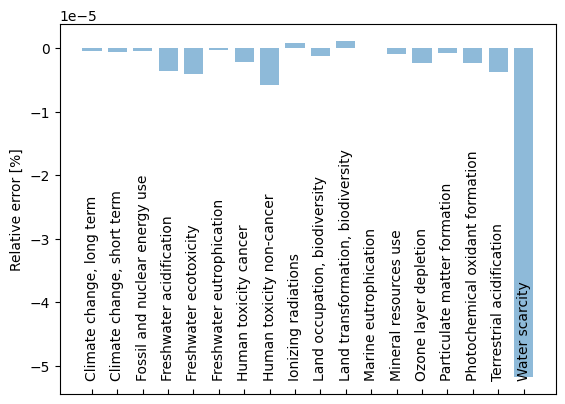

In [9]:
plot_comparison(comparison_pv_midpoints, save=False)

The test for PV, which verifies whether the construction impacts are reproduced correctly. These results are in line with the test in "test_basics.ipynb" (for which the matrix was not extended).

## WIND

Ecoinvent units:
- construction: [/unit] (units of 2 MW)
- use : [/kWh]

ES units:
- construction: [/GW]
- use: [/GWh] (and not MW)

Capacity factor: 2e(-3) (construction)
Conversion factor: 1e(-6) (use)

Energy use example: 1 GWh

In [10]:
for impact in midpoint_categories:
    print(impact_computation(tech="WIND", impact=impact, conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="midpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False))

Climate change, long term: 1.1386e+06 kg CO2 eq (long)
Climate change, short term: 1.2149e+06 kg CO2 eq (short)
Fossil and nuclear energy use: 1.6392e+07 MJ deprived
Freshwater acidification: 4.9711e+03 kg SO2 eq
Freshwater ecotoxicity: 4.4149e+08 CTUe
Freshwater eutrophication: 6.8533e+01 kg PO4 P-lim eq
Human toxicity cancer: 2.8931e-01 CTUh
Human toxicity non-cancer: 3.9841e-01 CTUh
Ionizing radiations: 8.9512e+06 Bq C-14 eq
Land occupation, biodiversity: 7.0250e+04 m2 arable land eq .yr
Land transformation, biodiversity: 7.2940e+02 m2 arable land eq
Marine eutrophication: 3.0412e+02 kg N N-lim eq
Mineral resources use: 2.3636e+05 kg deprived
Ozone layer depletion: 9.6226e-02 kg  CFC-11 eq
Particulate matter formation: 7.7716e+02 kg PM2.5 eq
Photochemical oxidant formation: 5.5516e+03 kg NMVOC eq
Terrestrial acidification: 5.2271e+03 kg SO2 eq
Water scarcity: 5.8125e+05 m3 world-eq


In [11]:
for impact in endpoint_categories_EQ:
    print(impact_computation(tech="WIND", impact=impact, conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="endpoint", format="clean", R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False))

Climate change, ecosystem quality, long term: 6.8803e+05 PDF.m2.yr
Climate change, ecosystem quality, short term: 2.1496e+05 PDF.m2.yr
Freshwater acidification: 1.1446e+04 PDF.m2.yr
Freshwater ecotoxicity, long term: 2.0436e+05 PDF.m2.yr
Freshwater ecotoxicity, short term: 4.1814e+04 PDF.m2.yr
Freshwater eutrophication: 2.4831e+02 PDF.m2.yr
Ionizing radiation, ecosystem quality: 1.6668e-04 PDF.m2.yr
Land occupation, biodiversity: 4.6232e+04 PDF.m2.yr
Land transformation, biodiversity: 1.1610e+05 PDF.m2.yr
Marine acidification, long term: 1.6516e+05 PDF.m2.yr
Marine acidification, short term: 1.7947e+04 PDF.m2.yr
Marine eutrophication: 2.6610e+03 PDF.m2.yr
Terrestrial acidification: 7.4984e+04 PDF.m2.yr
Thermally polluted water: 1.9386e+00 PDF.m2.yr
Water availability, freshwater ecosystem: 4.1435e+00 PDF.m2.yr
Water availability, terrestrial ecosystem: 5.3310e+01 PDF.m2.yr


### Midpoints

In [12]:
comparison_wind_midpoints = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="midpoint", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False)

In [13]:
display(comparison_wind_midpoints)

,es_moo,brightway,rel_error
"Climate change, long term",1.138610e+06,1.138610e+06,-3.249154e-09
"Climate change, short term",1.214906e+06,1.214906e+06,-3.883112e-09
Fossil and nuclear energy use,1.639249e+07,1.639249e+07,-6.884753e-09
Freshwater acidification,4.971062e+03,4.971063e+03,-1.586946e-08
Freshwater ecotoxicity,4.414926e+08,4.414926e+08,-1.710968e-08
Freshwater eutrophication,6.853333e+01,6.853333e+01,2.830204e-08
Human toxicity cancer,2.893127e-01,2.893127e-01,1.754165e-08
Human toxicity non-cancer,3.984143e-01,3.984143e-01,-2.016116e-08
Ionizing radiations,8.951216e+06,8.951216e+06,3.340451e-09
"Land occupation, biodiversity",7.025004e+04,7.025004e+04,2.824489e-08


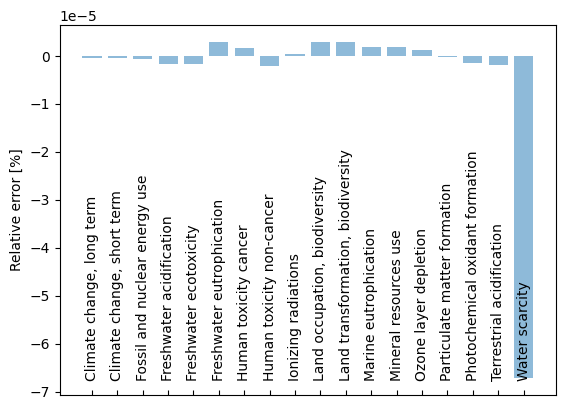

In [14]:
plot_comparison(comparison_wind_midpoints, save=False)

### Endpoints

In [15]:
comparison_wind_endpoints = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="endpoint", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False)
display(comparison_wind_endpoints)

,es_moo,brightway,rel_error
"Climate change, human health, long term",3.132161,3.132161,-6.723354e-10
"Climate change, human health, short term",0.993457,0.993457,7.520697e-09
"Human toxicity cancer, long term",0.020571,0.020571,1.078722e-08
"Human toxicity cancer, short term",3.306525,3.306525,2.579530e-08
"Human toxicity non-cancer, long term",0.645476,0.645476,-1.580283e-09
"Human toxicity non-cancer, short term",0.430242,0.430242,-6.837246e-08
"Ionizing radiation, human health",0.001880,0.001880,2.829731e-08
Ozone layer depletion,0.000222,0.000222,-3.942025e-09
Particulate matter formation,0.932597,0.932597,-2.242075e-08
Photochemical oxidant formation,0.000216,0.000216,-4.296564e-09


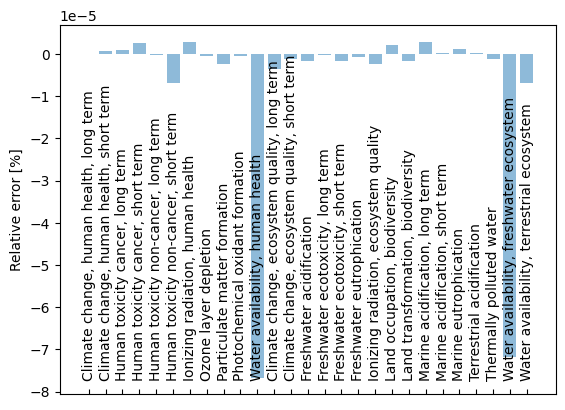

In [16]:
plot_comparison(comparison_wind_endpoints, save=False)

### AoP

In [17]:
comparison_wind_aop = comparison(tech="WIND", conversion_factor=0.000001, capacity_factor=0.002, use_value=1e6, indicator="aop", df_bw_mid=wind_midpoints_bw, df_bw_end=wind_endpoints_bw, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False)
display(comparison_wind_aop)

,es_moo,brightway,rel_error
Human health,1.092072e+01,1.092072e+01,-9.876846e-08
Ecosystem quality,1.583996e+06,1.583996e+06,-1.508568e-08


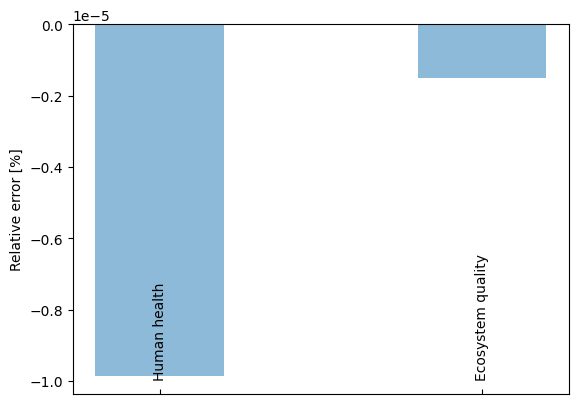

In [18]:
plot_comparison(comparison_wind_aop, save=False)

## NEW_HYDRO_DAM

Hydro dams ES unit are [GW] for construction and [GWh] for use. In ecoinvent, construction is on [kW]. Capacity factor: 0.8

In [19]:
name = "NEW_HYDRO_DAM"
display(R_long_tot_use[R_long_tot_use.ES_name == name])
display(R_long_tot_constr[R_long_tot_constr.ES_name == name])

,Impact category,CF unit,tech_id,value,ES_name,ES_region
4770,"Climate change, ecosystem quality, long term",PDF.m2.yr,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,2.596377e-11,NEW_HYDRO_DAM,RoW
4771,"Climate change, ecosystem quality, short term",PDF.m2.yr,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,9.232786e-11,NEW_HYDRO_DAM,RoW
4772,"Climate change, human health, long term",DALY,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,1.130693e-16,NEW_HYDRO_DAM,RoW
4773,"Climate change, human health, short term",DALY,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,4.277575e-16,NEW_HYDRO_DAM,RoW
4774,"Climate change, long term",kg CO2 eq (long),29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,2.002712e-10,NEW_HYDRO_DAM,RoW
4775,"Climate change, short term",kg CO2 eq (short),29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,5.231164e-10,NEW_HYDRO_DAM,RoW
4776,Fossil and nuclear energy use,MJ deprived,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,5.012979e-10,NEW_HYDRO_DAM,RoW
4777,Freshwater acidification,PDF.m2.yr,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,1.242989e-13,NEW_HYDRO_DAM,RoW
4778,Freshwater acidification,kg SO2 eq,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,5.368558e-14,NEW_HYDRO_DAM,RoW
4779,Freshwater ecotoxicity,CTUe,29tz2jmk-2f6p-sy8o-kv7w-gxqzyntqjkkr_79gxrg1m-...,2.565245e-09,NEW_HYDRO_DAM,RoW


,Impact category,CF unit,tech_id,value,ES_name,ES_region
4770,"Climate change, ecosystem quality, long term",PDF.m2.yr,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,1.186845e+10,NEW_HYDRO_DAM,RoW
4771,"Climate change, ecosystem quality, short term",PDF.m2.yr,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,3.541632e+09,NEW_HYDRO_DAM,RoW
4772,"Climate change, human health, long term",DALY,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,5.403899e+04,NEW_HYDRO_DAM,RoW
4773,"Climate change, human health, short term",DALY,a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,1.636807e+04,NEW_HYDRO_DAM,RoW
4774,"Climate change, long term",kg CO2 eq (long),a97e9a1d-a316-497a-9e6c-e595edfe99f7_bb6df298-...,1.934181e+10,NEW_HYDRO_DAM,RoW
...,...,...,...,...,...,...
4855,Thermally polluted water,PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,1.727513e+04,NEW_HYDRO_DAM,RoW
4856,"Water availability, freshwater ecosystem",PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,6.947832e+04,NEW_HYDRO_DAM,RoW
4857,"Water availability, human health",DALY,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,2.585825e+04,NEW_HYDRO_DAM,RoW
4858,"Water availability, terrestrial ecosystem",PDF.m2.yr,5719e12f-71ac-447d-a555-3aa8b1136dcf_0a67114d-...,4.170863e+05,NEW_HYDRO_DAM,RoW


## BUS_EV

**CONSTRUCTION**

BUS_EV_CAR
ecoinvent unit: [/unit]
ES unit: [/unit]
Capacity factor: 1

+++

BUS_EV_BATT
ecoinvent unit: [/kg]
ES unit: [/unit]
Capacity factor: 1000 (battery weight per vehicle)

===

BUS_EV
ecoinvent unit: N/A
ES unit: [/unit] or [/Mp.km/h]
Capacity factor: 1 or 1.8265e-4 (40 000 km/yr * 40e-6 Mp / 8760 hours/yr --> 1 bus worth 1.8265e-4 Mp.km/h)

**USE**

BUS_EV
ecoinvent unit: [/km]
ES unit: [/Mp.km]
Conversion factor: 100 000 / 40 = 25e3

Use example: 10 000 km

In [5]:
40000*40e-6/8760

0.00018264840182648402

In [6]:
1e6/40

25000.0

In [20]:
name = "BUS_EV"
display(R_long_tot_use[R_long_tot_use.ES_name == name])
display(R_long_tot_constr[R_long_tot_constr.ES_name == name])

,Impact category,CF unit,tech_id,value,ES_name,ES_region
315,"Climate change, ecosystem quality, long term",PDF.m2.yr,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,2.801455e-10,BUS_EV,GLO
316,"Climate change, ecosystem quality, short term",PDF.m2.yr,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,8.783301e-11,BUS_EV,GLO
317,"Climate change, human health, long term",DALY,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,1.275305e-15,BUS_EV,GLO
318,"Climate change, human health, short term",DALY,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,4.059438e-16,BUS_EV,GLO
319,"Climate change, long term",kg CO2 eq (long),cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,4.650923e-10,BUS_EV,GLO
320,"Climate change, short term",kg CO2 eq (short),cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,4.964003e-10,BUS_EV,GLO
321,Fossil and nuclear energy use,MJ deprived,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,7.062884e-09,BUS_EV,GLO
322,Freshwater acidification,PDF.m2.yr,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,5.332177e-12,BUS_EV,GLO
323,Freshwater acidification,kg SO2 eq,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,2.297128e-12,BUS_EV,GLO
324,Freshwater ecotoxicity,CTUe,cquw0wh3-t8jc-n3w4-6sup-fk9zxeh3ecy9_aw26njta-...,1.748025e-07,BUS_EV,GLO


,Impact category,CF unit,tech_id,value,ES_name,ES_region
6840,"Climate change, ecosystem quality, long term",PDF.m2.yr,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,2.163276e-01,BUS_EV,RoW
6841,"Climate change, ecosystem quality, short term",PDF.m2.yr,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,6.810688e-02,BUS_EV,RoW
6842,"Climate change, human health, long term",DALY,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,9.847666e-07,BUS_EV,RoW
6843,"Climate change, human health, short term",DALY,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,3.147626e-07,BUS_EV,RoW
6844,"Climate change, long term",kg CO2 eq (long),3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,3.592249e-01,BUS_EV,RoW
6845,"Climate change, short term",kg CO2 eq (short),3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,3.849081e-01,BUS_EV,RoW
6846,Fossil and nuclear energy use,MJ deprived,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,5.006722e+00,BUS_EV,RoW
6847,Freshwater acidification,PDF.m2.yr,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,4.379950e-03,BUS_EV,RoW
6848,Freshwater acidification,kg SO2 eq,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,1.887305e-03,BUS_EV,RoW
6849,Freshwater ecotoxicity,CTUe,3uphxsf6-rbsb-e052-oyug-a74dcqj9bzio_9z8h943d-...,1.576906e+02,BUS_EV,RoW


## CEMENT_PROD

Use:
ecoinvent unit: [/kg]
ES unit: [/t/year]
Conversion factor: 1e-6

Construction:
ecoinvent unit: [/unit] (cement factory)
ES unit: [/Mt/h]
Capacity factor: 38.812785 = 340000 / 8760

Use case : 1 factory + 1 Mt of cement

### Midpoints

In [21]:
comparison_cement_midpoints = comparison(tech="CEMENT_PROD", conversion_factor=0.000001, capacity_factor=38.812785, use_value=1e6, indicator="midpoint", df_bw_mid=cement_midpoints_bw, df_bw_end=None, R_constr=R_long_tot_constr, R_use=R_long_tot_use, no_use_phase=False)

In [22]:
display(comparison_cement_midpoints)

,es_moo,brightway,rel_error
"Climate change, long term",4.547584e+07,4.547584e+07,-8.886090e-10
"Climate change, short term",4.788592e+07,4.788592e+07,-1.176674e-09
Fossil and nuclear energy use,5.170150e+08,5.170150e+08,4.487105e-09
Freshwater acidification,5.633612e+05,5.633612e+05,1.215545e-08
Freshwater ecotoxicity,5.379286e+10,5.379286e+10,7.213099e-09
Freshwater eutrophication,1.668331e+03,1.668331e+03,7.589777e-09
Human toxicity cancer,4.260053e+00,4.260053e+00,5.656810e-09
Human toxicity non-cancer,7.039264e+01,7.039264e+01,-1.188055e-08
Ionizing radiations,3.005391e+08,3.005391e+08,1.625111e-08
"Land occupation, biodiversity",1.086955e+07,1.086955e+07,9.066463e-09


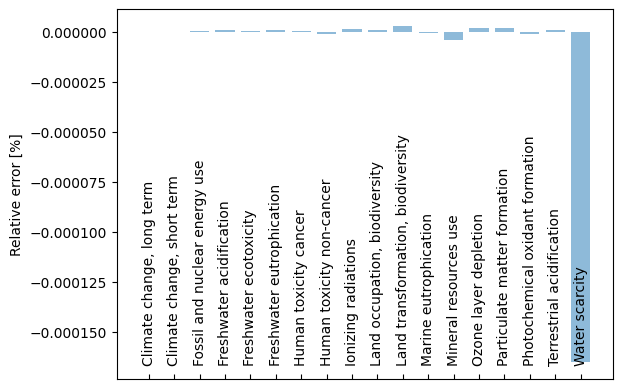

In [23]:
plot_comparison(comparison_cement_midpoints, save=False)